<a href="https://colab.research.google.com/github/borismikwa/Pre-training-Neural-Networks-On-Xeno-Canto-and-Ebird-for-Bioacoustic-Classification-Models/blob/main/base_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pickle
import librosa.display
import librosa
import numpy as np
import pandas as pd
from PIL import Image
from keras.models import Sequential
import tensorflow as tf
from keras.layers import Conv2D, MaxPooling2D,MaxPool2D
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.optimizers import SGD,Adam,Adamax
from sklearn.metrics import confusion_matrix, roc_auc_score,f1_score,precision_recall_fscore_support,roc_curve,auc
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import f1_score
import matplotlib
import matplotlib.pylab as plt
from google.colab import files
from imblearn.over_sampling import SMOTE,RandomOverSampler
from collections import Counter
from keras import models
import librosa.display
import librosa
import sklearn.metrics as metrics
import math

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
#Function to upload pickle file
def upload(feature, label):
  infile = open(feature,'rb')
  x= pickle.load(infile)
  infile.close()

  infile = open(label,'rb')
  y= pickle.load(infile)
  infile.close()

  return x, y

#Augmnantation funtion
def augment_data(aug_indices,data,Y,aug_target):
  aug = []
  y_aug_label = []
  counter = 1
  n=0
  num_iter = math.ceil((aug_target-len(aug_indices))/len(aug_indices))
  # data = list(X)
  while(n<num_iter):
    for i in range(len(aug_indices)) :
      #print(i)
      if counter > aug_target-len(aug_indices):
      #if counter > 5:
        break
      shift = np.random.randint(100)
      new_aug = np.roll(data[aug_indices[i]],shift=shift)
      #print(np.asarray(new_aug).shape)
  
      aug.append(new_aug)
      y_aug_label.append(Y[aug_indices[i]])
      counter += 1

    n += 1
  #aug =np.array(aug)
  #y_aug_label =np.array(y_aug_label)
  return np.asarray(aug), np.asarray(y_aug_label)

  #Function to  remove space
def remove_space_labels(images,Y_val):
  del_y = list(np.where(Y_val=='')[0])#Get the indices of labels to be deleted
  x_del = list(images)

  #Use a for loop to delete the indices with Spaces as target from X
  for i in del_y:
    x_del.pop(i)

  # Change the list produce into array
  X_prep = np.array( x_del)
  Y_prep = Y_val[Y_val!= '']
  
  return X_prep,Y_prep

#Function to remove nan
def remove_nan_labels(images,Y_val):
  del_y = list(np.where(Y_val=='nan')[0])#Get the indices of labels to be deleted
  x_del = list(images)

  #Use a for loop to delete the indices with Spaces as target from X
  for i in del_y:
    x_del.pop(i)

  # Change the list produce into array
  X_prep = np.array( x_del)
  Y_prep = Y_val[Y_val!= 'nan']
  
  return X_prep,Y_prep


Upload CRC

In [ ]:
crc_x, y_crc = upload('/content/drive/MyDrive/Thesis/Primary_data/train/X_crc.pkl','/content/drive/MyDrive/Thesis/Primary_data/train/Y_crc.pkl')

In [ ]:
crc_x.shape

(2050, 128, 216, 1)

In [ ]:
y_crc.shape

(2050,)

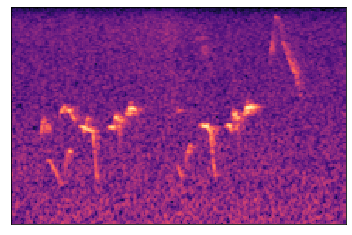

In [ ]:
librosa.display.specshow(crc_x[100,:,:,0])

get indicece

In [ ]:
crc_indices = np.where (y_crc=='CRC')[0]

In [ ]:
crc_x_aug, crc_y_aug = augment_data (crc_indices,crc_x,y_crc,7000)

In [ ]:
crc_x_aug.shape

(4950, 128, 216, 1)

In [ ]:
crc_y_aug.shape

(4950,)

Text(0, 0.5, 'Frequency (Hz)')

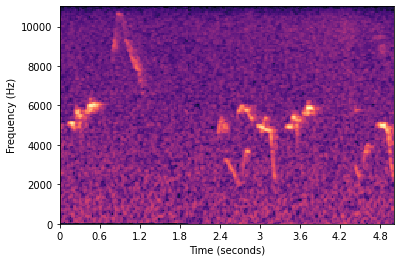

In [ ]:
librosa.display.specshow(crc_x_aug[100,:,:,0],y_axis='hz',x_axis='s')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency (Hz)')

In [ ]:
# crc_x = np.concatenate([crc_x,crc_x_aug],axis=0)
# y_crc = np.concatenate([y_crc,crc_y_aug],axis = 0)

In [ ]:
del crc_x_aug,crc_y_aug

In [ ]:
crc_x.shape

(2050, 128, 216, 1)

In [ ]:
np.unique(y_crc)

array(['CRC'], dtype='<U5')

In [ ]:
y_crc.shape

(2050,)

Upload PTW

In [ ]:
ptw_x, y_ptw = upload('/content/drive/MyDrive/Thesis/Primary_data/train/X_ptw.pkl','/content/drive/MyDrive/Thesis/Primary_data/train/Y_ptw.pkl')

In [ ]:
ptw_x.shape

(5315, 128, 216, 1)

Text(0, 0.5, 'Frequency (Hz)')

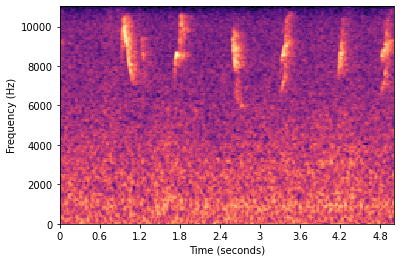

In [ ]:
librosa.display.specshow(ptw_x[1500,:,:,0],y_axis='hz',x_axis='s')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency (Hz)')

Limit the number of PTW to 2050 to ensure data balance

In [ ]:
ptw_x = ptw_x[0:2050]
y_ptw = y_ptw[0:2050]

In [ ]:
ptw_indices = np.where(y_ptw=="PTW")[0]
len(ptw_indices)

In [ ]:
ptw_x_aug, ptw_y_aug = augment_data (ptw_indices,ptw_x,y_ptw,7000)

In [ ]:
ptw_x_aug.shape

In [ ]:
# ptw_x = np.concatenate([ptw_x,ptw_x_aug],axis=0)
# y_ptw = np.concatenate([y_ptw,ptw_y_aug],axis=0)
print("The X shape after augmentation is",ptw_x.shape)
print("The Y shape after augmentation is",y_ptw.shape)

In [ ]:
del ptw_x_aug, ptw_y_aug

In [ ]:
librosa.display.specshow(ptw_x[9,:,:,0])

Upload NOISE

In [ ]:
noise_x1, y_noise1 = upload('/content/drive/MyDrive/Thesis/Primary_data/train/X_noise1.pkl','/content/drive/MyDrive/Thesis/Primary_data/train/Y_noise1.pkl')

In [ ]:
noise_x2, y_noise2 = upload('/content/drive/MyDrive/Thesis/Primary_data/train/X_noise2.pkl','/content/drive/MyDrive/Thesis/Primary_data/train/Y_noise2.pkl')

Text(0, 0.5, 'Frequency (Hz)')

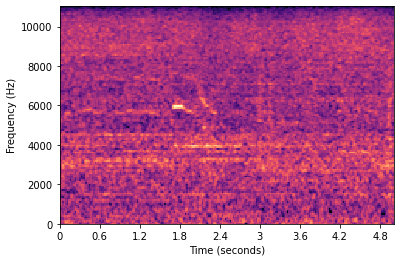

In [ ]:
librosa.display.specshow(noise_x2[3000,:,:,0],y_axis='hz',x_axis='s')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency (Hz)')

In [ ]:
noise_x =np.concatenate([noise_x1,noise_x2],axis =0)
y_noise = np.concatenate([y_noise1,y_noise2],axis =0)

In [ ]:
noise_x = noise_x[0:2050]
y_noise =y_noise[0:2050]

In [ ]:
noise_x.shape

In [ ]:
del noise_x1,noise_x2,y_noise1,y_noise2

In [ ]:
np.unique(y_noise)

In [ ]:
librosa.display.specshow(noise_x[100,:,:,0])

In [ ]:
X = np.concatenate([crc_x, ptw_x,noise_x], axis=0)
Y = np.concatenate([y_crc, y_ptw,y_noise], axis=0)

In [ ]:
X.shape

In [ ]:
Y.shape

In [ ]:
del crc_x, ptw_x,noise_x,y_crc, y_ptw,y_noise

**Label Encoding**

In [ ]:
l_enc = preprocessing.LabelEncoder()
l_enc.fit(Y)
print(l_enc.classes_)
y_enc =l_enc.transform(Y)
l_enc.classes_

**One hot encoding**

In [ ]:
y = tf.keras.utils.to_categorical(y_enc, num_classes=None, dtype="float32")

In [ ]:
y.shape

**Train Test Split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [ ]:
y_test.shape

In [ ]:
del X,Y

**Train A Model**

In [ ]:
model = Sequential()
# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(128, 216, 1), activation='relu'))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
#model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
#model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
#model.add(MaxPool2D(pool_size=(2, 2)))
#model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
#model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu'))
# model.add(MaxPool2D(pool_size=(2, 2)))
#
model.add(Flatten())
# 128 NEURONS IN DENSE HIDDEN LAYER
# model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

#model.load_weights("/content/drive/MyDrive/Thesis/Primary_data/base_model/my_keras_model_im_without_aug")
#lr = 0.01
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("/content/drive/MyDrive/Thesis/Primary_data/base_model/model_6250_run1", monitor= 'val_accuracy',save_best_only=True)

early_stop = EarlyStopping(monitor='val_accuracy',patience=10)
history = model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test),callbacks = [checkpoint_cb,early_stop])


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 126, 214, 32)      320       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 63, 107, 32)       0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 61, 105, 32)       9248      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 30, 52, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 28, 50, 32)        9248      
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 26, 48, 32)        9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 13, 24, 32)       

In [ ]:
# model = Sequential()
# model.add(Conv2D(filters=16, kernel_size=(3,3),input_shape=(128, 216, 1), activation='relu'))
# model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu'))
# model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu'))
# model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu'))
# model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu'))
# model.add(MaxPool2D(pool_size=(2, 2)))
# #model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
# model.add(Flatten())
# model.add(Dense(16, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(3, activation='softmax'))

# model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# model.summary()

# #hdf5
# checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("/content/drive/MyDrive/Thesis/Primary_data/base_model/model_6250_run1b", 
#                                                    mode = 'max', monitor= 'val_accuracy',save_best_only=True);

# early_stop = EarlyStopping(monitor='val_accuracy',patience=10)
# history = model.fit(X_train,y_train,epochs=100,
#                     validation_data=(X_test,y_test),
#                     callbacks = [checkpoint_cb,early_stop])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 126, 214, 16)      160       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 63, 107, 16)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 61, 105, 16)       2320      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 30, 52, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 50, 16)        2320      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 25, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 12, 23, 16)       

In [ ]:
 model.save("/content/drive/MyDrive/Thesis/Primary_data/base_model/model_21000run3_best")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Thesis/Primary_data/base_model/model_21000run3_best/assets


In [ ]:
model.evaluate(X_test,y_test)

114/114 [==============================] - 1s 8ms/step - loss: 0.2520 - accuracy: 0.9588


[0.2520376741886139, 0.9588170051574707]

Test using training

In [ ]:
X_testing, Y_testing = upload('/content/drive/MyDrive/Thesis/Primary_data/test/X.pkl','/content/drive/MyDrive/Thesis/Primary_data/test/Y.pkl')

In [ ]:
np.unique(Y_testing)

array(['', 'CRC', 'NOISE', 'NOISE ', 'NOSE', 'PTW', 'PTW10', 'PW', 'PWT',
       'nan'], dtype='<U6')

In [ ]:
Y_testing[Y_testing=='NOSE']='NOISE'
Y_testing[Y_testing=='NOISE ']='NOISE'
Y_testing[Y_testing=='PWT']='PTW'
Y_testing[Y_testing=='PW']='PTW'
Y_testing[Y_testing=='PTW10']='PTW'

X_testing,Y_testing = remove_space_labels(X_testing,Y_testing)

In [ ]:
np.unique(Y_testing)

array(['CRC', 'NOISE', 'PTW', 'nan'], dtype='<U6')

In [ ]:
X_testing.shape

(14416, 128, 216, 1)

In [ ]:
Y_testing.shape

(14416,)

Remove nana

In [ ]:
np.where(Y_testing=='nan')[0]

array([ 8473, 10097, 10098, 10099])

In [ ]:
X_testing, Y_testing = remove_nan_labels(X_testing,Y_testing)

In [ ]:
np.unique(Y_testing)

array(['CRC', 'NOISE', 'PTW'], dtype='<U6')

In [ ]:
X_testing.shape

(14412, 128, 216, 1)

In [ ]:
Y_testing.shape

(14412,)

Load saved model and evaluate it

In [ ]:
#trained_model = tf.keras.models.load_model("/content/drive/MyDrive/Thesis/Primary_data/model_saved15000_5kernel/my_keras_model100_3_128_filter.h5")
#trained_model = tf.keras.models.load_model("/content/drive/MyDrive/Thesis/Primary_data/base_model/model_21000run4")
trained_model = tf.keras.models.load_model("/content/drive/MyDrive/Thesis/Primary_data/base_model/model_6250_run1")


**Evaluate the model on the entire testing data**

Label encode the Y values

In [ ]:
l_enc_testing = preprocessing.LabelEncoder()
l_enc_testing.fit(Y_testing)
print(l_enc_testing.classes_)
y_enc_testing =l_enc_testing.transform(Y_testing)
l_enc_testing.classes_

['CRC' 'NOISE' 'PTW']


array(['CRC', 'NOISE', 'PTW'], dtype='<U6')

In [ ]:
y_testing = tf.keras.utils.to_categorical(y_enc_testing, num_classes=None, dtype="float32")
 

In [ ]:
#del X_testing, Y_testing

In [ ]:
y_testing.shape

(14412, 3)

In [ ]:
trained_model.evaluate(X_testing,y_testing)
#model.evaluate(X_testing,y_testing)

451/451 [==============================] - 17s 5ms/step - loss: 0.5501 - accuracy: 0.8935


[0.5500863790512085, 0.8934915065765381]

**Load another variance of the model**

In [ ]:
trained_model = tf.keras.models.load_model("/content/drive/MyDrive/Thesis/Primary_data/base_model/model_6250_run1b")
#trained_model  = model

In [ ]:
trained_model.evaluate(X_testing,y_testing)

451/451 [==============================] - 2s 5ms/step - loss: 0.5501 - accuracy: 0.8935


[0.5500863790512085, 0.8934915065765381]

**Confusion Matrix**

In [ ]:
p_pred = np.argmax(trained_model.predict(X_testing),axis=1)

In [ ]:
con_matrix =  metrics.confusion_matrix(y_enc_testing,p_pred)

In [ ]:
con_matrix

array([[1187,  227,   22],
       [ 485, 7881,  346],
       [  54,  401, 3809]])

In [ ]:
f1_score(y_enc_testing, p_pred, average='micro')

0.8934915348320843

In [ ]:
precision_recall_fscore_support(y_enc_testing, p_pred, average='weighted')

(0.8982039208815585, 0.8934915348320843, 0.8951078821201581, None)

Trying the test set with the best pretrained model

In [ ]:
modelcp1 = model

In [ ]:
modelcp1.evaluate(X_testing,y_testing)

451/451 [==============================] - 4s 8ms/step - loss: 2.6401 - accuracy: 0.6777


[2.640136241912842, 0.6776991486549377]

In [ ]:
p_pred = np.argmax(modelcp1.predict(X_testing),axis=1)

In [ ]:
con_matrix =  metrics.confusion_matrix(y_enc_testing,p_pred)
con_matrix

array([[1161,  246,   29],
       [2240, 5587,  885],
       [ 408,  837, 3019]])

AUC


In [ ]:
y_pred= modelcp1.predict(X_testing)

In [ ]:
n_classes = 3

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_testing[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


In [ ]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_testing.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

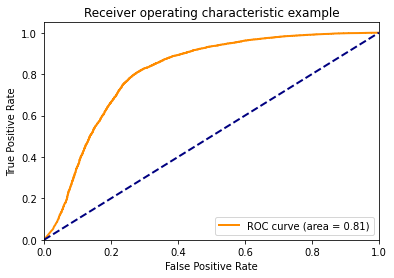

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()